<big>**Лабораторный практикум 10. Приведение квадратичной формы к каноническому виду ортогональным преобразованием переменных.**<big>

Загрузка необходимых библиотек:

In [57]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

**Упражнение 10.1. Найти матрицу перехода $T$, которая приводит матрицу $A = \begin{pmatrix}
1 & -3 & 1\\
3 & -3 & -1\\
3 & -5 & 1
\end{pmatrix}$ к диагональному виду. Сделать проверку: $A=T*D*T^{-1}$.** 

In [99]:
A = Matrix([[1, -3, 1],
            [3, -3, -1],
            [3, -5, 1]])
T, D = A.diagonalize()

pprint(T)

⎡2  1  4⎤
⎢       ⎥
⎢3  1  1⎥
⎢       ⎥
⎣3  1  7⎦


Проверка:

In [90]:
print(np.dot(T, np.dot(D, T.inv())))

[[1 -3 1]
 [3 -3 -1]
 [3 -5 1]]


**Упражнение 10.2. Привести к каноническому виду квадратичную форму $F(x_1, x_2, x_3) = 6x_1^2 + 5x_2^2 + 7x_3^2-4x_1x_2+4x_1x_3$.**

In [100]:
A = Matrix([[6, -4/2, 4/2],
            [-4/2, 5, 0/2],
            [4/2, 0/2, 7]])

T, D = A.diagonalize()
x, y, z = symbols('x y z')
f = D[2, 2] * x ** 2 + D[1, 1] * y ** 2 + D[0, 0] * z ** 2
print(f)

9.0*x**2 + 6.0*y**2 + 3.0*z**2


**Упражнение 10.3. Определить тип кривой $2x^2-4xy+5y^2+8x-2y+9=0$. Найти каноническое уравнение и записать формулы перехода к новым переменным. Построить кривую в новой системе координат.**

In [313]:
A = Matrix([[2, -2],
            [-2, 5]])
T, D = A.diagonalize()

# нормализация
arr = []
arr.append(T[0] / sqrt(T[0] ** 2 + T[1] ** 2))
arr.append(T[1] / sqrt(T[0] ** 2 + T[1] ** 2))
arr.append(T[2] / sqrt(T[2] ** 2 + T[3] ** 2))
arr.append(T[3] / sqrt(T[2] ** 2 + T[3] ** 2))
T[0], T[1], T[2], T[3] = arr[0], arr[1], arr[2], arr[3]

x1, y1 = symbols('x1 y1')
X1 = Matrix([[x1, y1]])
X = T * X1.T
print('x =', simplify(X[0, 0]))
print('y =', simplify(X[1, 0]))

F = 2 * X[0] ** 2 - 4 * X[0] * X[1] + 5 * X[1] ** 2 + 8 * X[0] - 2 * X[1] + 9

F = simplify(F)
print(F)

x = sqrt(5)*(2*x1 - y1)/5
y = sqrt(5)*(x1 + 2*y1)/5
x1**2 + 14*sqrt(5)*x1/5 + 6*y1**2 - 12*sqrt(5)*y1/5 + 9


Выделение полного квадрата.

In [318]:
x1, y1 = symbols('x1 y1')
curr = (14 * np.sqrt(5) / 5) / (2 * np.sqrt(1))
curr2 = (-12 * np.sqrt(5) / 5) / (2 * np.sqrt(6))

eqq = (x1 + curr) ** 2 + (y1 + curr2) ** 2 + 9 - curr ** 2 - curr2 ** 2
print(eqq/2)

4.9*(0.31943828249997*x1 + 1)**2 + 0.6*(0.912870929175277*y1 - 1)**2 - 1.0


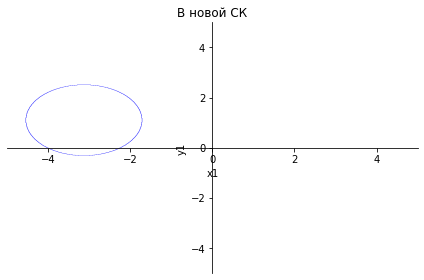

In [325]:
var('x y')
plot_implicit(Eq(4.9 * (0.31943828249997 * x1 + 1) ** 2 + 0.6 * (0.912870929175277 * y1 - 1) ** 2, 1), title='В новой СК', xlabel='x1', ylabel='y1')
plt.show()

*Эллипс.*

**Упражнение 10.4. Определить тип кривой $x^2+4xy+4y^2-6x-2y+1=0$. Найти каноническое уравнение и записать формулы перехода к новым переменным. Построить кривую в старой и новой системах координат.**

In [332]:
A = Matrix([[1, 2],
            [2, 4]])
T, D = A.diagonalize()

# нормализация
arr = []
for i in range(len(T)):
    if i % 2 == 0:
        arr.append(T[i] / sqrt(T[i] ** 2 + T[i + 1] ** 2))
    else:
        arr.append(T[i] / sqrt(T[i - 1] ** 2 + T[i] ** 2))

for i in range(len(T)):
    T[i] = arr[i]

x1, y1 = symbols('x1 y1')
X1 = Matrix([[x1, y1]])
X = T * X1.T
print('x=', simplify(X[0, 0]))
print('y=', simplify(X[1, 0]))

F = X[0] ** 2 + 4 * X[0] * X[1] + 4 * X[1] ** 2 - 6 * X[0] - 2 * X[1] + 1

F = simplify(F)
print(F)

x= sqrt(5)*(-2*x1 + y1)/5
y= sqrt(5)*(x1 + 2*y1)/5
2*sqrt(5)*x1 + 5*y1**2 - 2*sqrt(5)*y1 + 1


Выделение полного квадрата.

In [322]:
x1, y1 = symbols('x1 y1')
curr = (- 2*sqrt(5)) / (2 * np.sqrt(5))

eqq = 2*sqrt(5)*x1 + (y1 + curr2) ** 2 + 9 - curr ** 2
print(eqq/8)

sqrt(5)*x1/4 + 0.15*(0.912870929175277*y1 - 1)**2 + 1.0


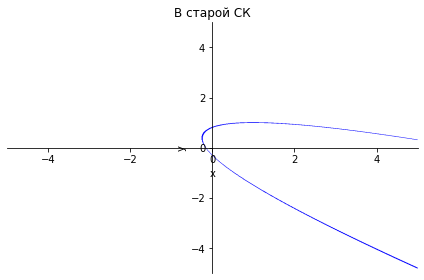

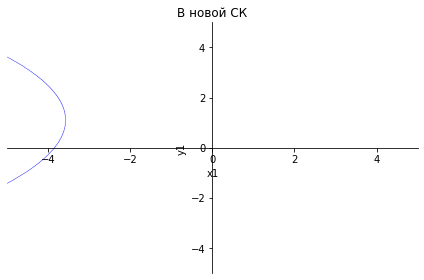

In [324]:
var('x y')
plot_implicit(Eq(x ** 2 + 4 * x * y + 4 * y ** 2 - 6 * x - 2 * y, +1), title='В старой СК', xlabel='x', ylabel='y')
plot_implicit(Eq(sqrt(5)*x1/4 + 0.15*(0.912870929175277*y1 - 1)**2 + 1.0, -1), title='В новой СК', xlabel='x1', ylabel='y1')
plt.show()

*Парабола.*

**Упражнение 10.5. Определить тип поверхности $x^2-2y^2+z^2+4xy-8xz-4yz+6=0$ и построить ее в новой системе координат.**

In [340]:
A = Matrix([[1, 2, -4],
            [2, -2, -2],
            [-4, -2, 1]])
T, D = A.diagonalize()

# нормализация
arr = []
for i in range(len(T)):
    if i % 3 == 0:
        arr.append(T[i] / sqrt(T[i] ** 2 + T[i + 1] ** 2 + T[i + 2] ** 2))
    else:
        if i % 3 == 1:
            arr.append(T[i] / sqrt(T[i - 1] ** 2 + T[i] ** 2 + T[i + 1] ** 2))
        else:
            arr.append(T[i] / sqrt(T[i - 2] ** 2 + T[i - 1] ** 2 + T[i] ** 2))
for i in range(len(T)):
    T[i] = arr[i]

x1, y1, z1 = symbols('x1 y1 z1')
X1 = Matrix([[x1, y1, z1]])
X = T * X1.T
print('x =', simplify(X[0, 0]))
print('y =', simplify(X[1, 0]))
print('z =', simplify(X[2, 0]))

F = X[0] ** 2 - 2 * X[1] ** 2 + X[2] ** 2 + 4 * X[0] * X[1] - 8 * X[0] * X[2] - 4 * X[1] * X[2] + 6

F = simplify(F)
print(F)

x = sqrt(6)*(-x1 + y1 - 2*z1)/6
y = sqrt(5)*(2*x1 - z1)/5
z = sqrt(5)*(y1 + 2*z1)/5
-2*(2*x1 - z1)**2/5 - 4*(2*x1 - z1)*(y1 + 2*z1)/5 - 2*sqrt(30)*(2*x1 - z1)*(x1 - y1 + 2*z1)/15 + (y1 + 2*z1)**2/5 + 4*sqrt(30)*(y1 + 2*z1)*(x1 - y1 + 2*z1)/15 + (x1 - y1 + 2*z1)**2/6 + 6
